<a href="https://colab.research.google.com/github/ParkGeunHae/miniproject2/blob/main/%EC%98%AC%EB%A6%BC%ED%94%BD%EB%A9%94%EB%8B%AC%EC%A7%91%EA%B3%84_%EC%83%89%EB%B3%80%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
# plt.rc('font', family='Malgun Gothic')    # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정적 크롤링과 전처리

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
import re             #정규표현식 모듈


FILE = './olympic_medals.csv'

def medal_total(result):
    cnt = 0
    medal_url = 'https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84'
    print(medal_url)
    html = urllib.request.urlopen(medal_url)
    soupmedals = BeautifulSoup(html, 'html.parser')
    tag_tbody = soupmedals.find('tbody')

    for olim in tag_tbody.find_all('tr'):
        olim_td = olim.find_all('td')
        if len(olim_td) < 16:  # 확인: 적어도 16개의 열이 있어야 함
            continue

        #html요소에서 텍스트를 추출하고(get_text) 좌우 공백 제거(strip)
        #하계정보
        country_name = re.sub(r'\s*\[[^]]*\]', '', olim_td[0].get_text().strip())  #정규표현식 사용하여 []안의 내용 제거함
        summer_count = olim_td[1].get_text().strip()
        gold_s = olim_td[2].get_text().strip()
        silver_s = olim_td[3].get_text().strip()
        bronze_s = olim_td[4].get_text().strip()
        summer_total = olim_td[5].get_text().strip()

        #동계정보
        winter_count = olim_td[6].get_text().strip()
        gold_w = olim_td[7].get_text().strip()
        silver_w = olim_td[8].get_text().strip()
        bronze_w = olim_td[9].get_text().strip()
        winter_total = olim_td[10].get_text().strip()

        #전체정보
        total_count= olim_td[11].get_text().strip()
        gold_t=olim_td[12].get_text().strip()
        silver_t=olim_td[13].get_text().strip()
        bronze_t=olim_td[14].get_text().strip()
        sum_total=olim_td[15].get_text().strip()

        result.append([country_name, summer_count, gold_s, silver_s, bronze_s,summer_total,
                       winter_count,gold_w,silver_w,bronze_w,winter_total,
                       total_count,gold_t,silver_t,bronze_t,sum_total])
        cnt += 1
        print(f"{country_name} {summer_count} {gold_s} {silver_s} {bronze_s} {summer_total} "
              f"{winter_count} {gold_w} {silver_w} {bronze_w} {winter_total} "
              f"{total_count} {gold_t} {silver_t} {bronze_t} {sum_total}")

    return

    #[CODE 0]
def main():
    result = []
    print('올림픽 메달 정보 크롤링 >>>>>>>>>>>>>>>>>>>>>>>>>>')
    medal_total(result)   #[CODE 1] 호출
    medals_tbl = pd.DataFrame(result, columns=('국가(IOC코드)','하계참가횟수', '금_하계','은_하계','동_하계','하계_계',
                                               '동계참가횟수', '금_동계','은_동계','동_동계','동계_계',
                                               '전체참가횟수', '금_전체','은_전체','동_전체','전체_계'))
    medals_tbl.to_csv(FILE, encoding='utf-8', mode='w', index=True)
    del result[:]
    return medals_tbl

df = main()
df

올림픽 메달 정보 크롤링 >>>>>>>>>>>>>>>>>>>>>>>>>>
https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84
아프가니스탄 (AFG) 14 0 0 2 2 0 0 0 0 0 14 0 0 2 2
알제리 (ALG) 13 5 4 8 17 3 0 0 0 0 16 5 4 8 17
아르헨티나 (ARG) 24 21 25 28 74 19 0 0 0 0 43 21 25 28 74
아르메니아 (ARM) 6 2 6 6 14 7 0 0 0 0 13 2 6 6 14
오스트랄라시아 (ANZ) 2 3 4 5 12 0 0 0 0 0 2 3 4 5 12
오스트레일리아 (AUS) 26 147 163 187 497 19 5 5 5 15 45 152 168 192 512
오스트리아 (AUT) 27 18 33 36 87 23 64 81 87 232 50 82 114 123 319
아제르바이잔 (AZE) 6 7 11 24 42 6 0 0 0 0 12 7 11 24 42
바하마 (BAH) 16 6 2 6 14 0 0 0 0 0 16 6 2 6 14
바레인 (BRN) 9 2 1 0 3 0 0 0 0 0 9 2 1 0 3
바베이도스 (BAR) 12 0 0 1 1 0 0 0 0 0 12 0 0 1 1
벨라루스 (BLR) 6 12 27 39 78 7 8 5 5 18 13 20 32 44 96
벨기에 (BEL) 26 40 53 55 148 21 1 2 3 6 47 41 55 58 154
버뮤다 (BER) 18 0 0 1 1 8 0 0 0 0 26 0 0 1 1
보헤미아 (BOH) 3 0 1 3 4 0 0 0 0 0 3 0 1 3 4
보츠와나 (BOT) 10 0 1 0 1 0 0 0 0 0 10 0 1 0 1
브라질 (BRA) 22 30 36 63 129 8 0 0 0 0 30 30 36 63 129
서인도 연방 (BWI) 1 0 0 2 2 0 0 0 0 0 1 0 0 2 2
불가

,국가(IOC코드),하계참가횟수,금_하계,은_하계,동_하계,하계_계,동계참가횟수,금_동계,은_동계,동_동계,동계_계,전체참가횟수,금_전체,은_전체,동_전체,전체_계
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,짐바브웨 (ZIM),13,3,4,1,8,1,0,0,0,0,14,3,4,1,8
148,독립 (IOA),3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP),1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


###1. 전체 메달 획득 현황 시각화

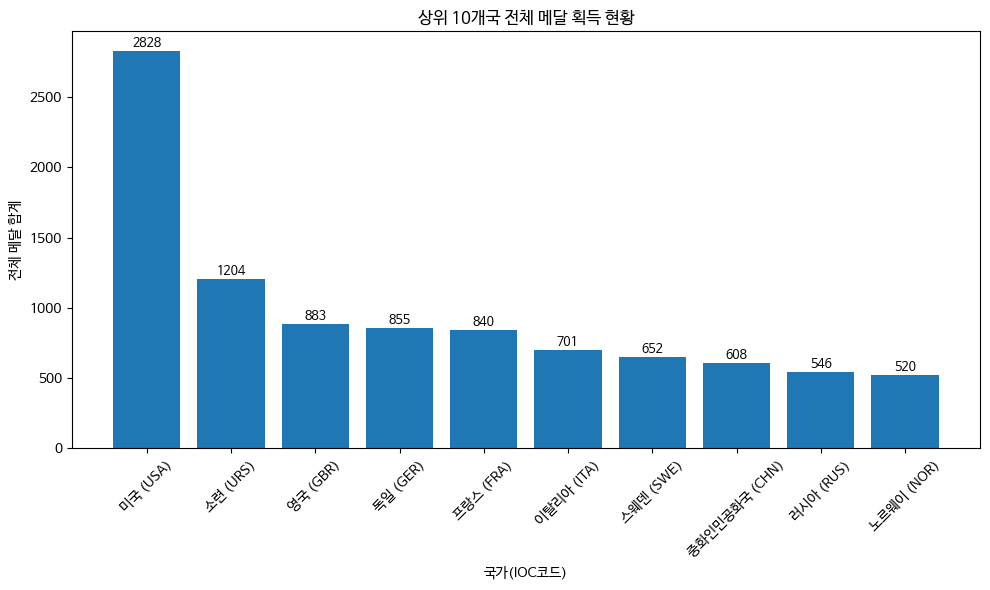

In [6]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# 국가별 전체 메달 합계 계산
total_medals = df.groupby('국가(IOC코드)')['전체_계'].sum().sort_values(ascending=False)

# 상위 10개국 추출
top_10_countries = total_medals.head(10).index

# # 막대 그래프 시각화
# plt.figure(figsize=(10, 6))
# plt.bar(top_10_countries, total_medals.loc[top_10_countries])
# plt.xlabel('국가(IOC코드)')
# plt.ylabel('전체 메달 합계')
# plt.title('상위 10개국 전체 메달 획득 현황')
# plt.xticks(rotation=45)
# plt.show()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries, total_medals.loc[top_10_countries])

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)

plt.xlabel('국가(IOC코드)')
plt.ylabel('전체 메달 합계')
plt.title('상위 10개국 전체 메달 획득 현황')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###2.하계 올림픽 vs 동계 올림픽 메달 획득 비교

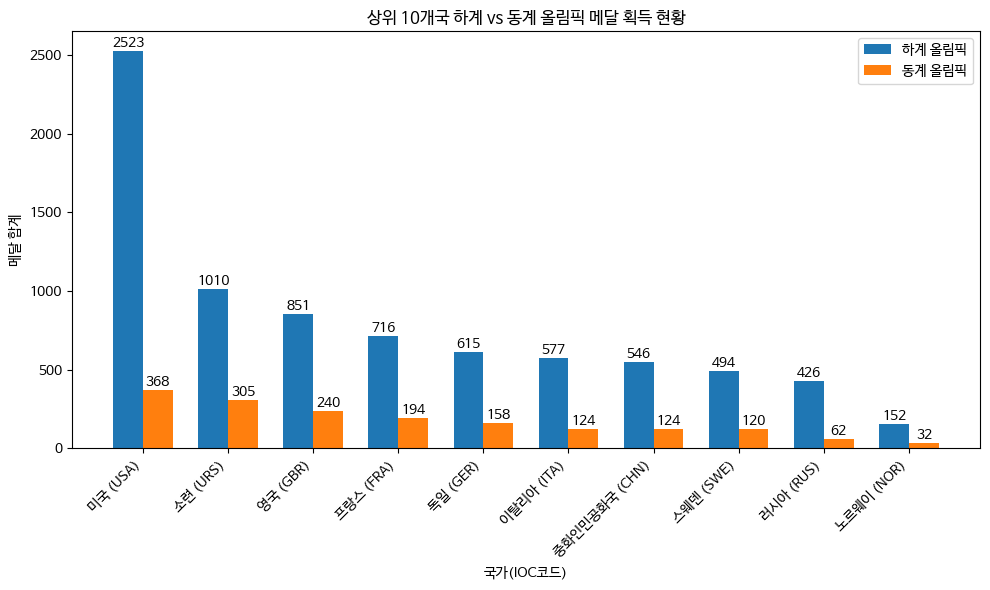

In [8]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# DataFrame의 인덱스를 '국가(IOC코드)' 열로 설정
df = df.set_index('국가(IOC코드)')

# 상위 10개국 선정
top_10_countries = df.groupby(level=0)['전체_계'].sum().sort_values(ascending=False).head(10).index

# 하계 올림픽 메달 합계
summer_medals = df.loc[top_10_countries, '하계_계'].sort_values(ascending=False)

# 동계 올림픽 메달 합계
winter_medals = df.loc[top_10_countries, '동계_계'].sort_values(ascending=False)

# 막대 그래프 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # 바 너비 설정

# 하계 올림픽 바 그래프
bar_positions = np.arange(len(summer_medals))
ax.bar(bar_positions - bar_width / 2, summer_medals.values, bar_width, label='하계 올림픽')

# 동계 올림픽 바 그래프
ax.bar(bar_positions + bar_width / 2, winter_medals.values, bar_width, label='동계 올림픽')

# 바 높이 값 표시
for i, (summer, winter) in enumerate(zip(summer_medals, winter_medals)):
    ax.text(i - bar_width / 2, summer, str(int(summer)), ha='center', va='bottom')
    ax.text(i + bar_width / 2, winter, str(int(winter)), ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(summer_medals.index, rotation=45, ha='right')
ax.legend()
ax.set_xlabel('국가(IOC코드)')
ax.set_ylabel('메달 합계')
ax.set_title('상위 10개국 하계 vs 동계 올림픽 메달 획득 현황')

plt.tight_layout()
plt.show()

###3.국가별 메달 획득 현황 분석

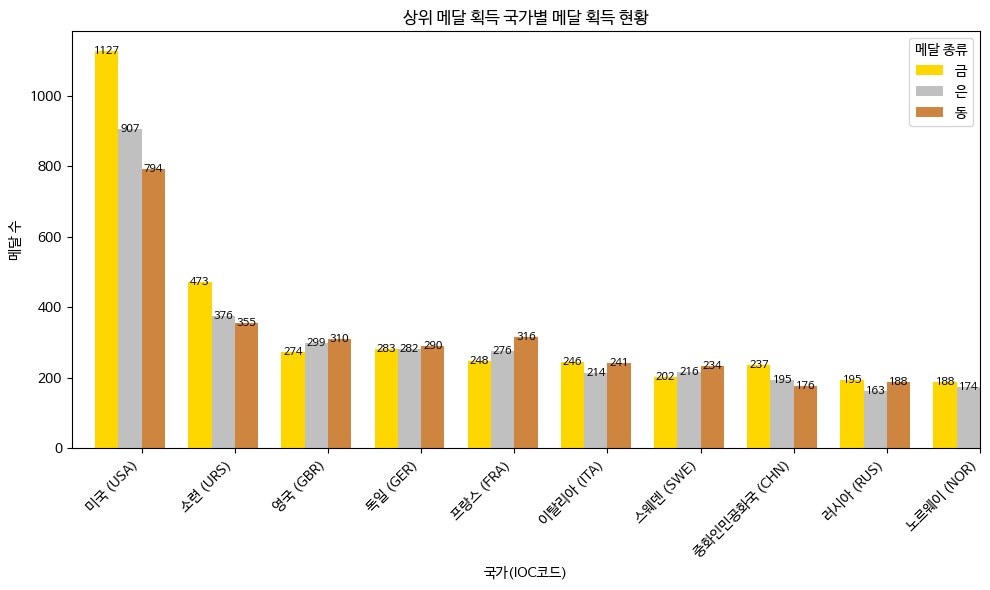

In [14]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# 국가별로 메달 획득 현황을 계산
country_medals = df.groupby('국가(IOC코드)')[['금_전체', '은_전체', '동_전체']].sum()

# 상위 메달 획득 국가를 추출
top_countries = country_medals.sum(axis=1).nlargest(10).index


# 상위 메달 획득 국가의 메달 획득 현황을 시각화
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 브론즈 메달 막대 그리기
country_medals.loc[top_countries]['동_전체'].plot(kind='bar', color='peru', position=0, width=0.25, label='동', ax=ax)

# 은 메달 막대 그리기
country_medals.loc[top_countries]['은_전체'].plot(kind='bar', color='silver', position=1, width=0.25, label='은', ax=ax)

# 골드 메달 막대 그리기
country_medals.loc[top_countries]['금_전체'].plot(kind='bar', color='gold', position=2, width=0.25, label='금', ax=ax)

plt.title('상위 메달 획득 국가별 메달 획득 현황')
plt.xlabel('국가(IOC코드)')
plt.ylabel('메달 수')

# legend 순서 변경
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='메달 종류')

plt.xticks(rotation=45, ha='right')

# 막대 위에 값을 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout() #그림 여백 자동 조정
plt.show()



# # 상위 메달 획득 국가의 메달 획득 현황을 시각화
# plt.figure(figsize=(10, 6))
# ax = country_medals.loc[top_countries].plot(kind='bar', stacked=True)
# plt.title('상위 메달 획득 국가별 메달 획득 현황')
# plt.xlabel('국가(IOC코드)')
# plt.ylabel('메달 수')
# plt.legend(title='메달 종류')
# plt.xticks(rotation=45, ha='right')

# # 막대 위에 값을 표시
# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
#     ax.annotate(f'{height:.0f}', (x + width/2, y + height), ha='center', va='center', fontsize=8, color='black')

# plt.tight_layout() #그림 여백 자동 조정
# plt.show()




###4.메달 종류별 획득 현황 분석

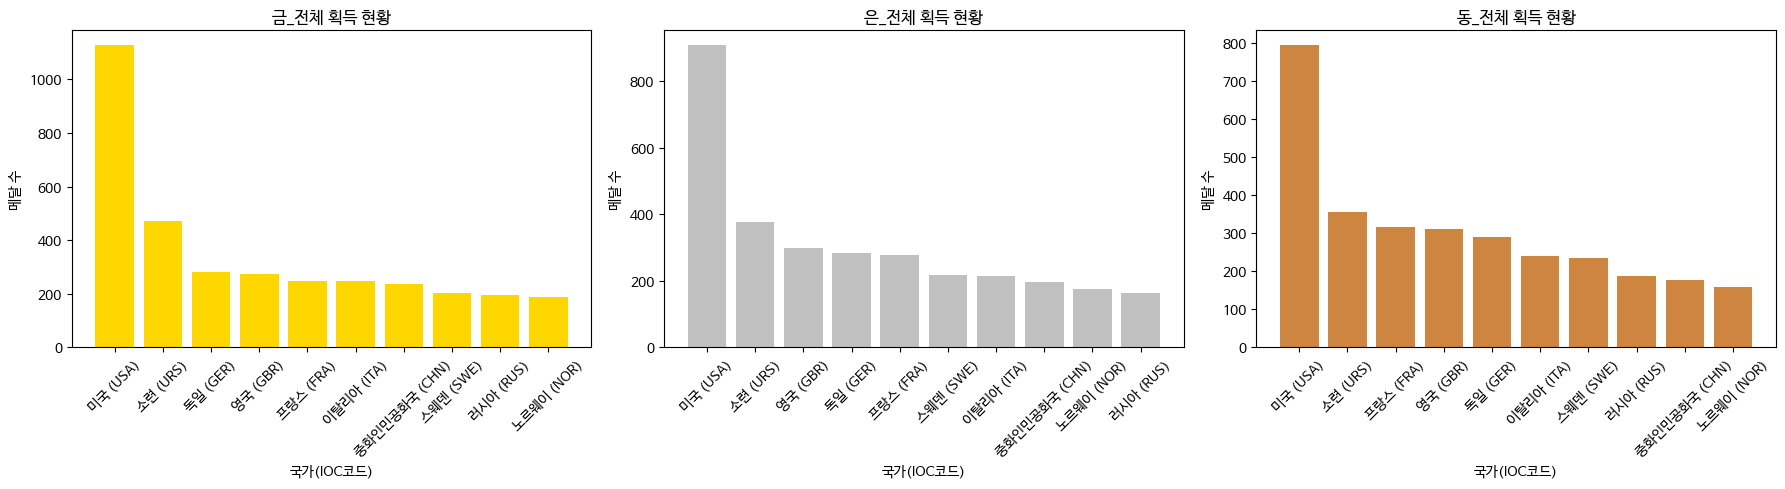

In [21]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# DataFrame의 인덱스를 '국가(IOC코드)' 열로 설정
df = df.set_index('국가(IOC코드)')

# 상위 10개국 선정
top_10_countries = df.groupby('국가(IOC코드)')['전체_계'].sum().sort_values(ascending=False).head(10).index

# 메달 종류별 획득 현황
medal_types = ['금_전체', '은_전체', '동_전체']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 메달 종류별 색상 지정
colors = ['gold', 'silver', 'peru']

for i, medal_type in enumerate(medal_types):
    ax = axs[i]
    medal_counts = df.loc[top_10_countries, medal_type].sort_values(ascending=False)
    ax.bar(medal_counts.index, medal_counts.values, color=colors[i])  # 색상 지정
    ax.set_title(f'{medal_type} 획득 현황')
    ax.set_xlabel('국가(IOC코드)')
    ax.set_ylabel('메달 수')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
